extract C-T from chromosome 1
investigate creating and ploting histograms

In [1]:
!zcat HG02791_blood_SRR833690.wgs.COMPLETE_GENOMICS.20130401.snps_indels_svs_meis.high_coverage.genotypes.vcf.gz | awk -F"\t" '($1 == 1 && $4 == "C" && $5 == "T"){print $2}' > chr1.C-T.txt

In [2]:
!zcat HG02791_blood_SRR833690.wgs.COMPLETE_GENOMICS.20130401.snps_indels_svs_meis.high_coverage.genotypes.vcf.gz | awk -F"\t" '($1 == 2 && $4 == "C" && $5 == "T"){print $2}' > chr2.C-T.txt

In [3]:
!head chr1.C-T.txt

56485
72787
128798
258930
548491
565286
565406
565591
565976
566130


In [4]:
!head chr2.C-T.txt

55777
61278
69431
76530
104618
104979
105259
105517
106655
107543


In [5]:
import numpy as np
from numpy import genfromtxt
positions = genfromtxt('chr1.C-T.txt', delimiter=',')

In [6]:
len(positions)

47171

hist is the value, and bins are the edges (so will be 1 longer than hist)

In [7]:
hist, bins = np.histogram(positions, bins=100)

In [8]:
len(hist), len(bins)

(100, 101)

In [9]:
hist[0]

611

In [10]:
bins[0], bins[1], bins[2], bins[3]

(56485.0, 2547979.83, 5039474.66, 7530969.49)

In [11]:
bins[3-2], bins[2-1], bins[1-0]

(2547979.83, 2547979.83, 2547979.83)

In [12]:
import matplotlib.pyplot as plt

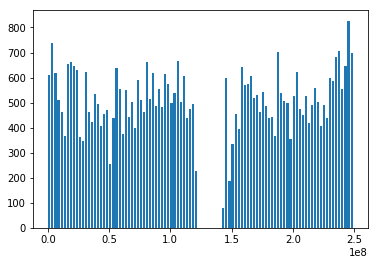

In [13]:
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [14]:
positions[0]

56485.0

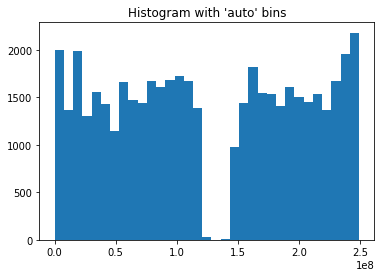

In [15]:
plt.hist(positions, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

The graphs are too narrow so change the figsize

In [16]:
print(plt.rcParams["figure.figsize"])

[6.0, 4.0]


In [17]:
plt.rcParams["figure.figsize"] = [16.0,4.0]

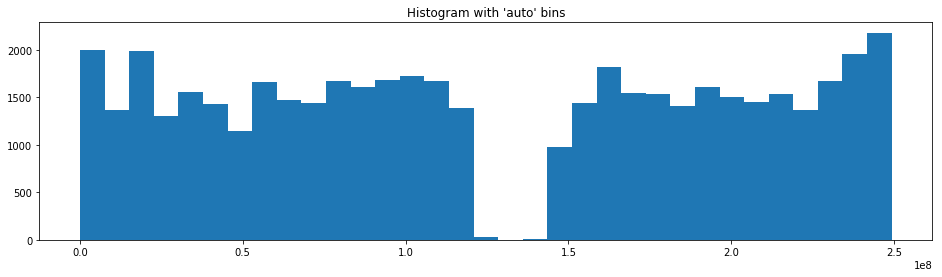

In [18]:
plt.hist(positions, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [19]:
print(plt.rcParams["figure.figsize"])

[16.0, 4.0]


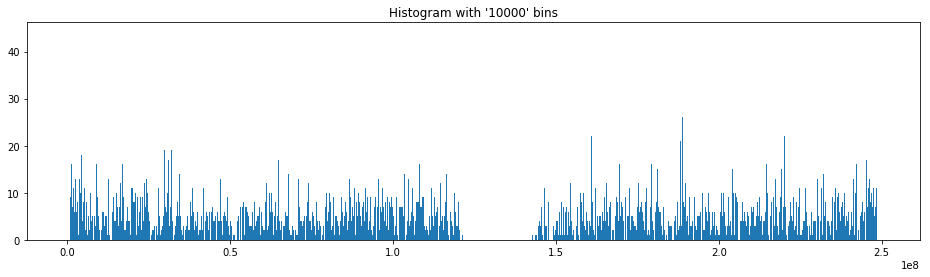

In [20]:
plt.hist(positions, bins=10000)  # arguments are passed to np.histogram
plt.title("Histogram with '10000' bins")
plt.show()

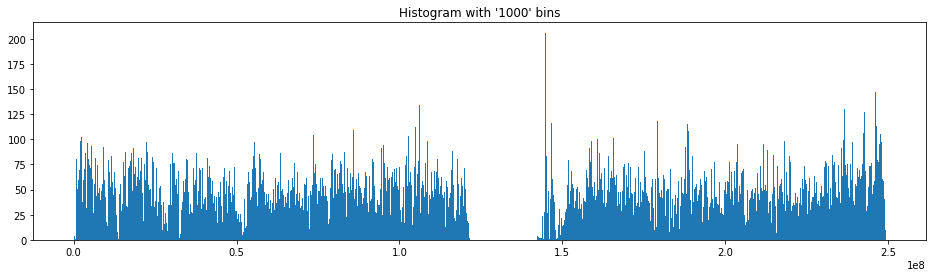

In [21]:
plt.hist(positions, bins=1000)  # arguments are passed to np.histogram
plt.title("Histogram with '1000' bins")
plt.show()

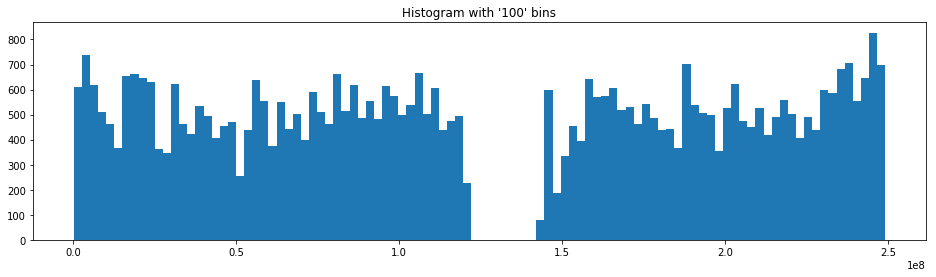

In [22]:
plt.hist(positions, bins=100)  # arguments are passed to np.histogram
plt.title("Histogram with '100' bins")
plt.show()

Let's try to compare 2 histograms

In [23]:
p1 = genfromtxt('chr1.C-T.txt', delimiter=',')
p2 = genfromtxt('chr2.C-T.txt', delimiter=',')

In [24]:
hist_1, bin_edges_1 = np.histogram(p1, bins=100)
hist_2, bin_edges_2 = np.histogram(p2, bins=100)

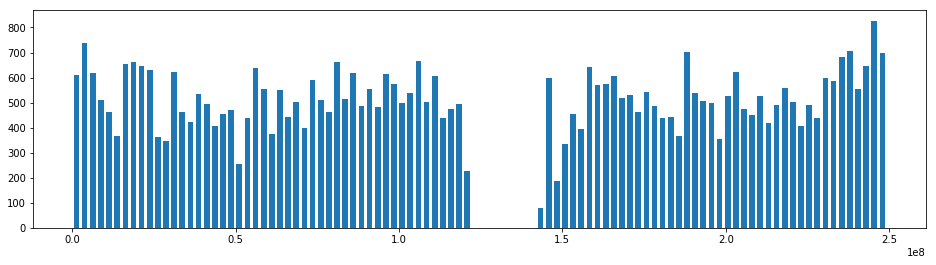

In [25]:
width = 0.7 * (bin_edges_1[1] - bin_edges_1[0])
center = (bin_edges_1[:-1] + bin_edges_1[1:]) / 2
plt.bar(center, hist_1, align='center', width=width)
plt.show()

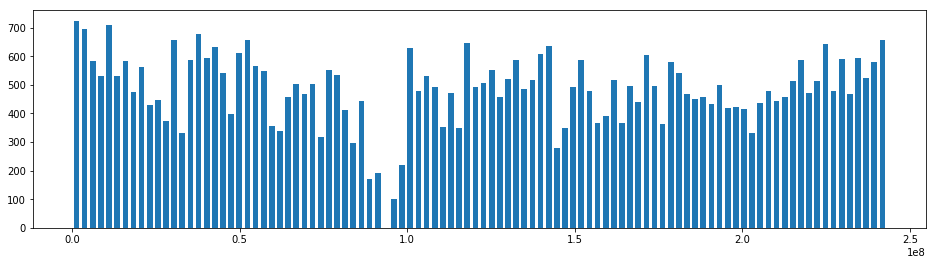

In [26]:
width = 0.7 * (bin_edges_2[1] - bin_edges_2[0])
center = (bin_edges_2[:-1] + bin_edges_2[1:]) / 2
plt.bar(center, hist_2, align='center', width=width)
plt.show()

In [27]:
hist_diff=hist_1 - hist_2

bin edges are NOT the same but today, I don't care

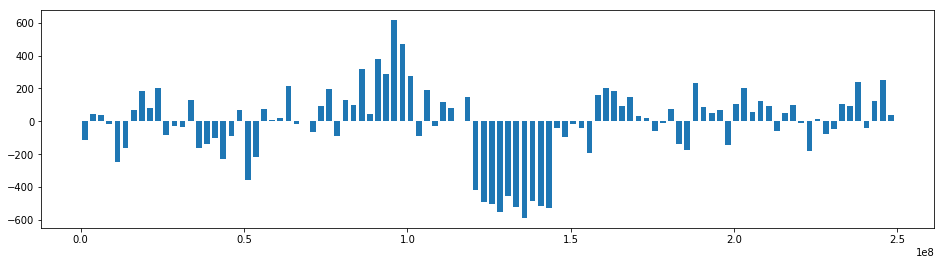

In [28]:
width = 0.7 * (bin_edges_1[1] - bin_edges_1[0])
center = (bin_edges_1[:-1] + bin_edges_1[1:]) / 2
plt.bar(center, hist_diff, align='center', width=width)
plt.show()